In [56]:
import config
from oandapyV20 import API
import pandas as pd
import pandas_ta as ta
import oandapyV20.endpoints.instruments as instruments


In [57]:
# Setup OANDA connection
client = API(access_token=config.OANDA_API_KEY)

In [58]:
# define variables
timeframe = "M15"
instrument = "GBP_JPY" #british pound to japanese yen

In [59]:
#Get Candle Data
df = get_candles("M15")
def get_candles (tf):
    #Ask for the price and set the timeframe
    params = {
        "granularity": tf,
        "price" : "A" 
    }

    r = instruments.InstrumentsCandles(instrument=instrument, params=params)
    candles = client.request(r)['candles']

    #parse through data

    data = []

    for c in candles:
        if c["complete"]:
            data.append(
                {
                    "time": c["time"],
                    "open": float(c["ask"]["o"]),
                    "high": float(c["ask"]["h"]),
                    "low": float(c["ask"]["l"]),
                    "close": float(c["ask"]["c"]),
                }
            )
    #and use pandas for better representation

    df = pd.DataFrame(data)
    df["time"] = pd.to_datetime(df["time"]) 

    return df

In [60]:
#call the candlestick function and set it to the price variable
price = get_candles(timeframe)
price = calculate_indicators(price)
price

,time,open,high,low,close,EMA_5,EMA_8,ATR_14
0,2025-05-21 23:15:00+00:00,193.118,193.143,193.006,193.051,NaN,NaN,NaN
1,2025-05-21 23:30:00+00:00,193.050,193.061,192.869,192.939,NaN,NaN,NaN
2,2025-05-21 23:45:00+00:00,192.938,192.994,192.802,192.866,NaN,NaN,NaN
3,2025-05-22 00:00:00+00:00,192.860,192.929,192.530,192.551,NaN,NaN,NaN
4,2025-05-22 00:15:00+00:00,192.548,192.646,192.458,192.547,192.790800,NaN,NaN
...,...,...,...,...,...,...,...,...
494,2025-05-29 02:45:00+00:00,195.867,195.920,195.800,195.870,195.923804,195.929472,0.175655
495,2025-05-29 03:00:00+00:00,195.866,195.872,195.755,195.833,195.893536,195.908034,0.171466
496,2025-05-29 03:15:00+00:00,195.831,195.901,195.797,195.812,195.866357,195.886693,0.166647
497,2025-05-29 03:30:00+00:00,195.814,195.923,195.757,195.832,195.854905,195.874539,0.166600


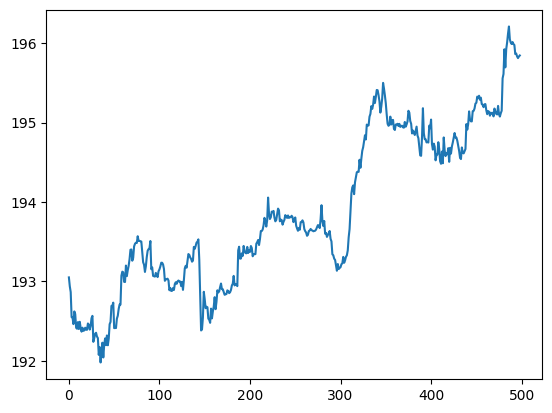

In [61]:
#Visualize the chart using matplot to ensure its working
import matplotlib.pyplot as plt
plt.plot(df['close'])
plt.show()

In [62]:

# Function to calculate indicators
def calculate_indicators(df):
    # EMAs
    df["EMA_5"] = ta.ema(df["close"], length=5)
    df["EMA_8"] = ta.ema(df["close"], length=8)

    # ATR
    df["ATR_14"] = ta.atr(df["high"], df["low"], df["close"], length=14)

    return df